In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.min_rows = 30

plt.style.use("ggplot")

In [2]:
import chardet

In [3]:
# with open('loan.csv', 'rb') as file:
#     data = chardet.detect(file.read())
#     print(data)

In [4]:
loan = pd.read_csv('loan.csv', low_memory=False)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan.shape

(39717, 111)

## Data Cleaning

In [8]:
loan.isnull().sum()/len(loan)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
                                ...   
num_rev_accts                 1.000000
num_rev_tl_bal_gt_0           1.000000
num_sats                      1.000000
num_tl_120dpd_2m              1.000000
num_tl_30dpd                  1.000000
num_tl_90g_dpd_24m            1.000000
num_tl_op_past_12m            1.000000
pct_tl_nvr_dlq                1.000000
percent_bc_gt_75              1.000000
pub_rec_bankruptcies     

In [9]:
useless_columns = loan.columns[loan.isnull().sum()/len(loan) > 0.5]

In [10]:
for column in loan.columns:
    print(loan[column].unique)

<bound method Series.unique of 0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
5        1075269
6        1069639
7        1072053
8        1071795
9        1071570
10       1070078
11       1069908
12       1064687
13       1069866
14       1069057
          ...   
39702      96350
39703      94838
39704      93277
39705      93061
39706      92676
39707      92666
39708      92552
39709      92533
39710      92507
39711      92402
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: int64>
<bound method Series.unique of 0        1296599
1        1314167
2        1313524
3        1277178
4        1311748
5        1311441
6        1304742
7        1288686
8        1306957
9        1306721
10       1305201
11       1305008
12       1298717
13       1304956
14       1303503
          ...   
39702      96338
39703      73673
39704      93254
39705      93057
39706      92671
39707      9266

In [11]:
useless_column_list = ['url', 'id', 'title', 'collections_12_mths_ex_med', 'tax_liens', 'desc', 'emp_title', 'policy_code', 'initial_list_status', 'last_credit_pull_d', 'policy_code', 'application_type', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'acc_now_delinq', 'total_acc', 'pymnt_plan', 'delinq_amnt', 'zip_code', 'out_prncp_inv', 'out_prncp', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv']
useless_column_list

['url',
 'id',
 'title',
 'collections_12_mths_ex_med',
 'tax_liens',
 'desc',
 'emp_title',
 'policy_code',
 'initial_list_status',
 'last_credit_pull_d',
 'policy_code',
 'application_type',
 'pub_rec_bankruptcies',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'total_acc',
 'pymnt_plan',
 'delinq_amnt',
 'zip_code',
 'out_prncp_inv',
 'out_prncp',
 'funded_amnt_inv',
 'funded_amnt',
 'total_pymnt_inv']

Removing __funded_amnt_inv__ and __funded_amnt__ since it is same as __loan_amt__

In [12]:
useless_column_list.extend(['funded_amnt_inv', 'funded_amnt'])

Remove those columns which will not be available when loan amount is allotted

In [13]:
useless_column_list.extend(['total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee'])

In [14]:
useless_column_list.extend(useless_columns.to_list())
useless_column_list

['url',
 'id',
 'title',
 'collections_12_mths_ex_med',
 'tax_liens',
 'desc',
 'emp_title',
 'policy_code',
 'initial_list_status',
 'last_credit_pull_d',
 'policy_code',
 'application_type',
 'pub_rec_bankruptcies',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'total_acc',
 'pymnt_plan',
 'delinq_amnt',
 'zip_code',
 'out_prncp_inv',
 'out_prncp',
 'funded_amnt_inv',
 'funded_amnt',
 'total_pymnt_inv',
 'funded_amnt_inv',
 'funded_amnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'recoveries',
 'collection_recovery_fee',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'in

In [15]:
len(loan.columns)

111

In [16]:
len(useless_column_list)

89

In [17]:
loan.drop(useless_column_list, axis = 1, inplace = True)

In [18]:
loan.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt
0,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,0,Jan-85,1,3,0,13648,83.70%,5863.155187,Jan-15,171.62
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40%,1008.710000,Apr-13,119.66
2,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,0,Nov-01,2,2,0,2956,98.50%,3005.666844,Jun-14,649.91
3,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21%,12231.890000,Jan-15,357.48
4,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,0,Jan-96,0,15,0,27783,53.90%,3513.330000,May-16,67.79


In [19]:
loan.shape

(39717, 26)

In [20]:
loan.isnull().sum()

member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_pymnt               0
last_pymnt_d             71
last_pymnt_amnt           0
dtype: int64

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [22]:
loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].mode()[0])

In [23]:
loan = loan[~loan['revol_util'].isnull()]

In [24]:
loan = loan[~loan['last_pymnt_d'].isnull()]

In [25]:
loan.isnull().sum()

member_id              0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_pymnt            0
last_pymnt_d           0
last_pymnt_amnt        0
dtype: int64

In [26]:
loan.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt
0,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,0,Jan-85,1,3,0,13648,83.70%,5863.155187,Jan-15,171.62
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40%,1008.710000,Apr-13,119.66
2,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,0,Nov-01,2,2,0,2956,98.50%,3005.666844,Jun-14,649.91
3,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21%,12231.890000,Jan-15,357.48
4,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,0,Jan-96,0,15,0,27783,53.90%,3513.330000,May-16,67.79


In [27]:
loan.loan_status.value_counts()

Fully Paid     32916
Charged Off     5544
Current         1140
Name: loan_status, dtype: int64

In [28]:
loan = loan[loan.loan_status != 'Current']
loan.loan_status.value_counts()

Fully Paid     32916
Charged Off     5544
Name: loan_status, dtype: int64

In [29]:
loan.nunique().sort_values()

loan_status                2
term                       2
verification_status        3
pub_rec                    5
home_ownership             5
grade                      7
inq_last_6mths             9
emp_length                11
delinq_2yrs               11
purpose                   14
sub_grade                 35
open_acc                  40
addr_state                50
issue_d                   55
last_pymnt_d             101
int_rate                 370
earliest_cr_line         524
loan_amnt                869
revol_util              1088
dti                     2853
annual_inc              5201
installment            14985
revol_bal              21262
last_pymnt_amnt        34389
total_pymnt            36613
member_id              38460
dtype: int64

In [30]:
master_df = loan.iloc[:]
master_df.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt
0,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,0,Jan-85,1,3,0,13648,83.70%,5863.155187,Jan-15,171.62
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40%,1008.710000,Apr-13,119.66
2,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,0,Nov-01,2,2,0,2956,98.50%,3005.666844,Jun-14,649.91
3,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21%,12231.890000,Jan-15,357.48
5,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,0,Nov-04,3,9,0,7963,28.30%,5632.210000,Jan-15,161.03


### Analysis

In [31]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38460 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            38460 non-null  int64  
 1   loan_amnt            38460 non-null  int64  
 2   term                 38460 non-null  object 
 3   int_rate             38460 non-null  object 
 4   installment          38460 non-null  float64
 5   grade                38460 non-null  object 
 6   sub_grade            38460 non-null  object 
 7   emp_length           38460 non-null  object 
 8   home_ownership       38460 non-null  object 
 9   annual_inc           38460 non-null  float64
 10  verification_status  38460 non-null  object 
 11  issue_d              38460 non-null  object 
 12  loan_status          38460 non-null  object 
 13  purpose              38460 non-null  object 
 14  addr_state           38460 non-null  object 
 15  dti                  38460 non-null 

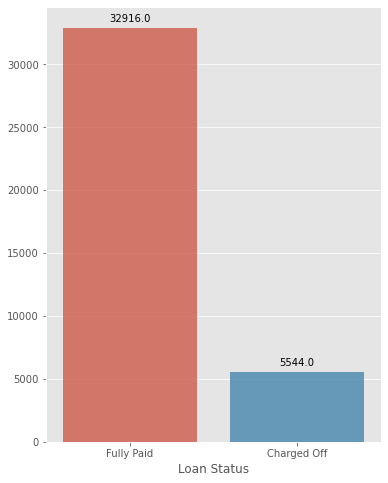

In [32]:
loan_status_count  = master_df.loan_status.value_counts()
plt.figure(figsize=(6,8))
g = sns.barplot(x=loan_status_count.index, y=loan_status_count.values, alpha=0.8)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Loan Status', fontsize=12)
plt.show()

In [33]:
master_df.loan_status.value_counts(normalize=True) * 100

Fully Paid     85.585023
Charged Off    14.414977
Name: loan_status, dtype: float64

__Around 14%__ people __defaulted__ the loan

In [34]:
#### Effect of loan amount on loan status

In [35]:
master_df.loan_amnt.describe()

count    38460.000000
mean     11059.603484
std       7346.867951
min        500.000000
25%       5375.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [36]:
master_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5544.0,12166.562951,8079.450687,900.0,5918.75,10000.0,16750.0,35000.0
Fully Paid,32916.0,10873.159710,7199.570647,500.0,5200.00,9600.0,15000.0,35000.0


In [37]:
type(master_df.loan_amnt.max())

int

In [38]:
loan_amnt_bins = [x for x in range(0, master_df.loan_amnt.max() + 1, 5000)]
loan_amnt_bins

[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]

In [39]:
loan_amnt_bins_label = [str(x)+'-'+str(x+5)+'k' for x in range (0, master_df.loan_amnt.max()//1000, 5)]
loan_amnt_bins_label

['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25-30k', '30-35k']

In [40]:
#Create Derived categorical variable
master_df['loan_amnt_bin'] = pd.cut(master_df['loan_amnt'], loan_amnt_bins, labels=loan_amnt_bins_label)

master_df.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt,loan_amnt_bin
0,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Jan-85,1,3,0,13648,83.70%,5863.155187,Jan-15,171.62,0-5k
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Apr-99,5,3,0,1687,9.40%,1008.710000,Apr-13,119.66,0-5k
2,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Nov-01,2,2,0,2956,98.50%,3005.666844,Jun-14,649.91,0-5k
3,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Feb-96,1,10,0,5598,21%,12231.890000,Jan-15,357.48,5-10k
5,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Nov-04,3,9,0,7963,28.30%,5632.210000,Jan-15,161.03,0-5k


In [41]:
master_df.groupby(['loan_amnt_bin', 'loan_status']).loan_amnt.count()

loan_amnt_bin  loan_status
0-5k           Charged Off     1272
               Fully Paid      8133
5-10k          Charged Off     1619
               Fully Paid     11153
10-15k         Charged Off     1050
               Fully Paid      6626
15-20k         Charged Off      744
               Fully Paid      3598
20-25k         Charged Off      538
               Fully Paid      2294
25-30k         Charged Off      142
               Fully Paid       557
30-35k         Charged Off      179
               Fully Paid       555
Name: loan_amnt, dtype: int64

In [42]:
loan_bin_status = master_df.groupby(['loan_status', 'loan_amnt_bin'])['loan_amnt_bin'].count()
loan_bin_status

loan_status  loan_amnt_bin
Charged Off  0-5k              1272
             5-10k             1619
             10-15k            1050
             15-20k             744
             20-25k             538
             25-30k             142
             30-35k             179
Fully Paid   0-5k              8133
             5-10k            11153
             10-15k            6626
             15-20k            3598
             20-25k            2294
             25-30k             557
             30-35k             555
Name: loan_amnt_bin, dtype: int64

In [43]:
num_of_loan_amt_bin=master_df.groupby('loan_amnt_bin')['loan_amnt_bin'].count()
num_of_loan_amt_bin

loan_amnt_bin
0-5k       9405
5-10k     12772
10-15k     7676
15-20k     4342
20-25k     2832
25-30k      699
30-35k      734
Name: loan_amnt_bin, dtype: int64

In [44]:
loan_amount_df = loan_bin_status.div(num_of_loan_amt_bin, level='loan_amnt_bin') * 100
loan_amount_df = loan_amount_df.reset_index(name="percentage")
loan_amount_df

,loan_status,loan_amnt_bin,percentage
0,Charged Off,0-5k,13.524721
1,Charged Off,5-10k,12.676167
2,Charged Off,10-15k,13.678999
3,Charged Off,15-20k,17.134961
4,Charged Off,20-25k,18.997175
5,Charged Off,25-30k,20.314735
6,Charged Off,30-35k,24.386921
7,Fully Paid,0-5k,86.475279
8,Fully Paid,5-10k,87.323833
9,Fully Paid,10-15k,86.321001


In [45]:
loan_bin_status = loan_bin_status.reset_index(name="count")
loan_bin_status['perc'] = loan_amount_df['percentage']
loan_bin_status

,loan_status,loan_amnt_bin,count,perc
0,Charged Off,0-5k,1272,13.524721
1,Charged Off,5-10k,1619,12.676167
2,Charged Off,10-15k,1050,13.678999
3,Charged Off,15-20k,744,17.134961
4,Charged Off,20-25k,538,18.997175
5,Charged Off,25-30k,142,20.314735
6,Charged Off,30-35k,179,24.386921
7,Fully Paid,0-5k,8133,86.475279
8,Fully Paid,5-10k,11153,87.323833
9,Fully Paid,10-15k,6626,86.321001


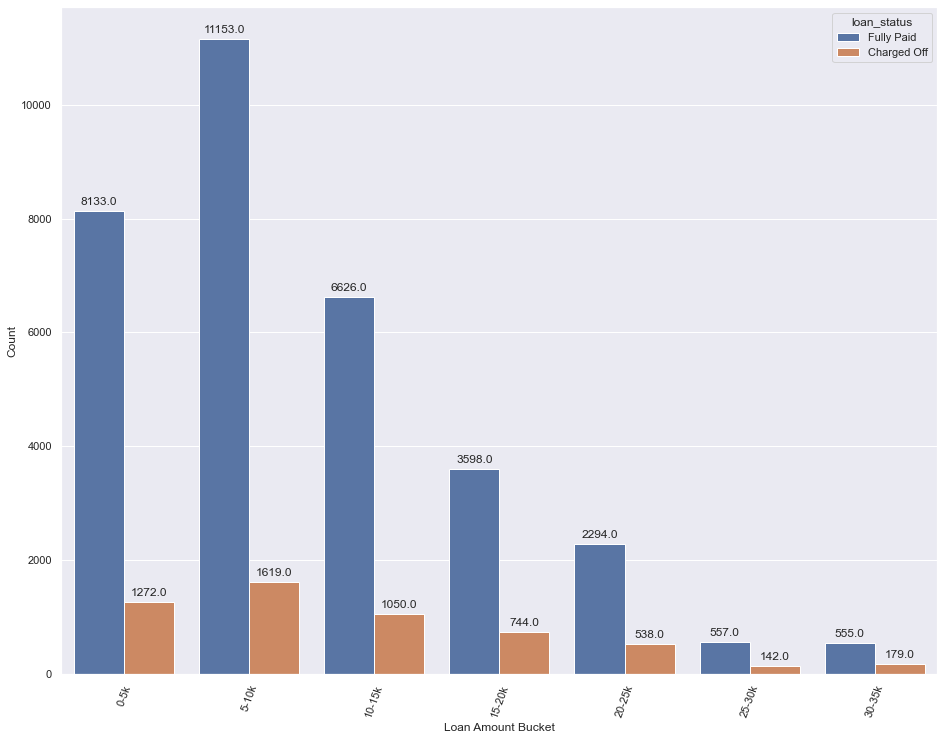

In [85]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
count_plt = sns.countplot(x=master_df.loan_amnt_bin, hue=master_df.loan_status)
count_plt.set(xlabel = "Loan Amount Bucket", ylabel = "Count")
for p in count_plt.patches:
            count_plt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

#### Categorical variable Analysis wrt loan status

In [47]:
def display_percentage_Table(df, column, default_column = "loan_status"):
    column_group = df.groupby([default_column, column]).loan_amnt.count()
    column_count = df.groupby(column)[column].count()
    print(column_group.div(column_count, level=column) * 100)
    
    column_group = column_group.reset_index(name='count')
    print(f"========================================================")
    print("Count of Charged Off")
    print(column_group[column_group['loan_status'] == 'Charged Off'].sort_values(by='count', ascending=False))
    print(f"========================================================")
    print(f"========================================================")

In [48]:
def category_plots(df, columns = [], default_column="loan_status"):
    for idx, val in enumerate(columns, start=1):
        sns.set(rc={'figure.figsize':(15.7,12.27)})
        ax = sns.countplot(x=master_df[default_column], hue=master_df[val])
        display_percentage_Table(df, val, default_column)
        print(plt.show())

loan_status  emp_length
Charged Off  1 year        14.077362
             10+ years     16.236978
             2 years       13.084112
             3 years       13.696576
             4 years       13.611779
             5 years       14.083622
             6 years       14.048059
             7 years       15.348565
             8 years       13.916084
             9 years       12.673753
             < 1 year      13.989753
Fully Paid   1 year        85.922638
             10+ years     83.763022
             2 years       86.915888
             3 years       86.303424
             4 years       86.388221
             5 years       85.916378
             6 years       85.951941
             7 years       84.651435
             8 years       86.083916
             9 years       87.326247
             < 1 year      86.010247
dtype: float64
Count of Charged Off
    loan_status emp_length  count
1   Charged Off  10+ years   1543
10  Charged Off   < 1 year    628
2   Charged Off    2 yea

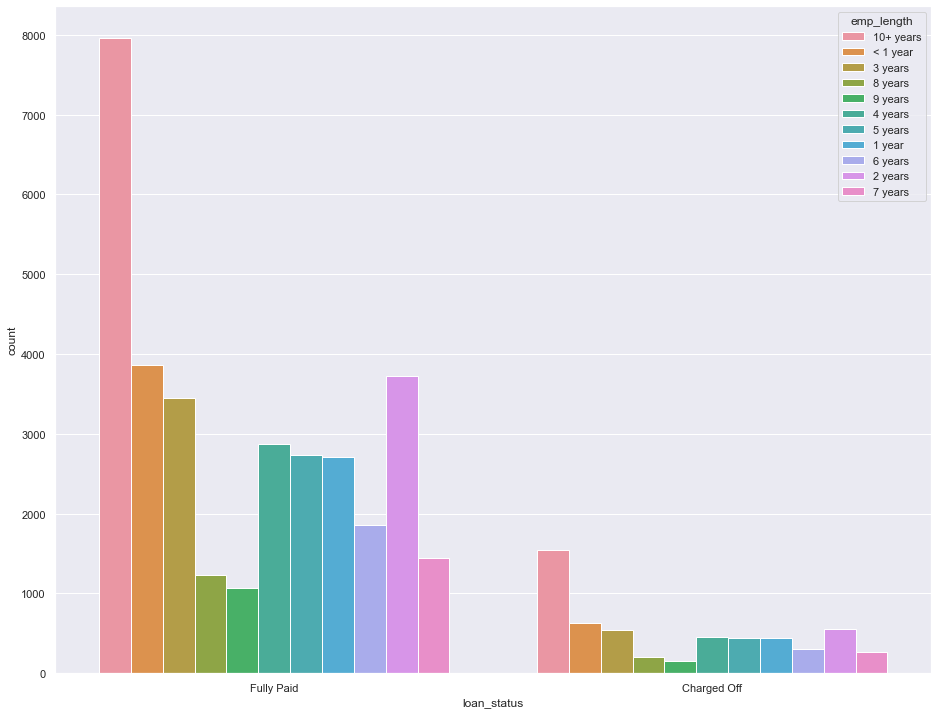

None
loan_status  home_ownership
Charged Off  MORTGAGE           13.590634
             OTHER              18.750000
             OWN                14.704890
             RENT               15.109517
Fully Paid   MORTGAGE           86.409366
             NONE              100.000000
             OTHER              81.250000
             OWN                85.295110
             RENT               84.890483
dtype: float64
Count of Charged Off
   loan_status home_ownership  count
3  Charged Off           RENT   2780
0  Charged Off       MORTGAGE   2310
2  Charged Off            OWN    436
1  Charged Off          OTHER     18


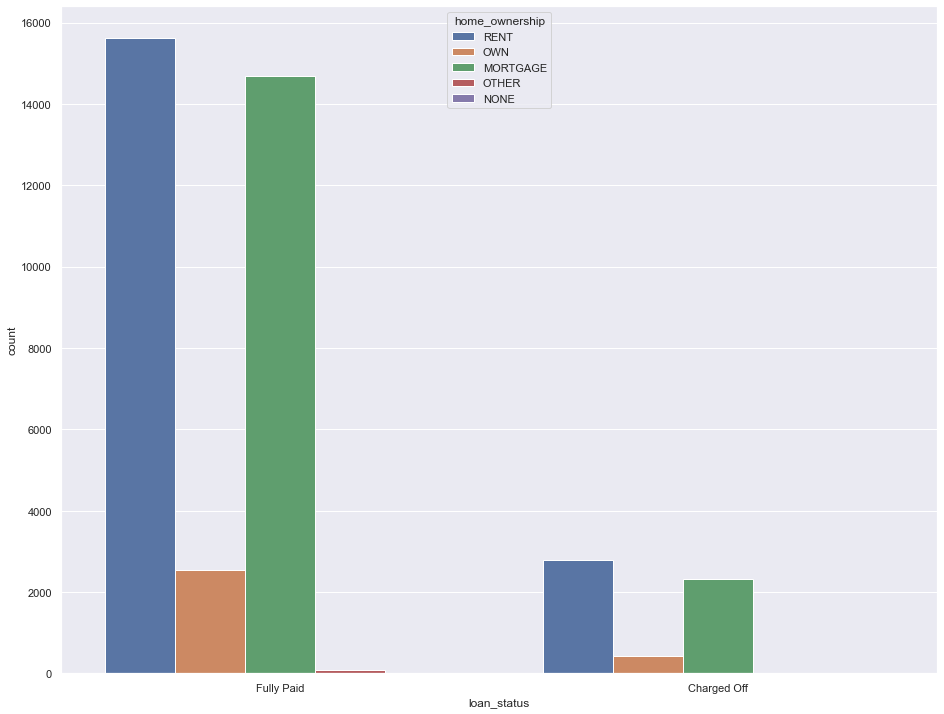

None
loan_status  verification_status
Charged Off  Not Verified           12.627781
             Source Verified        14.689734
             Verified               16.637924
Fully Paid   Not Verified           87.372219
             Source Verified        85.310266
             Verified               83.362076
dtype: float64
Count of Charged Off
   loan_status verification_status  count
0  Charged Off        Not Verified   2100
2  Charged Off            Verified   2026
1  Charged Off     Source Verified   1418


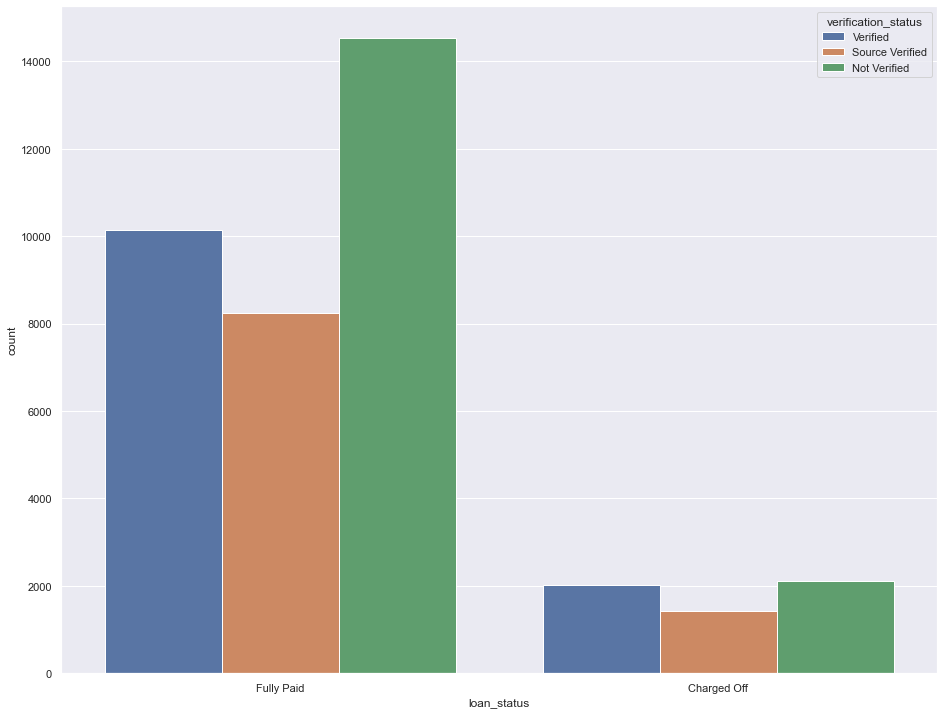

None
loan_status  grade
Charged Off  A         5.936846
             B        12.101201
             C        16.908275
             D        21.795886
             E        26.616257
             F        32.577320
             G        32.881356
Fully Paid   A        94.063154
             B        87.898799
             C        83.091725
             D        78.204114
             E        73.383743
             F        67.422680
             G        67.118644
dtype: float64
Count of Charged Off
   loan_status grade  count
1  Charged Off     B   1411
2  Charged Off     C   1318
3  Charged Off     D   1102
4  Charged Off     E    704
0  Charged Off     A    596
5  Charged Off     F    316
6  Charged Off     G     97


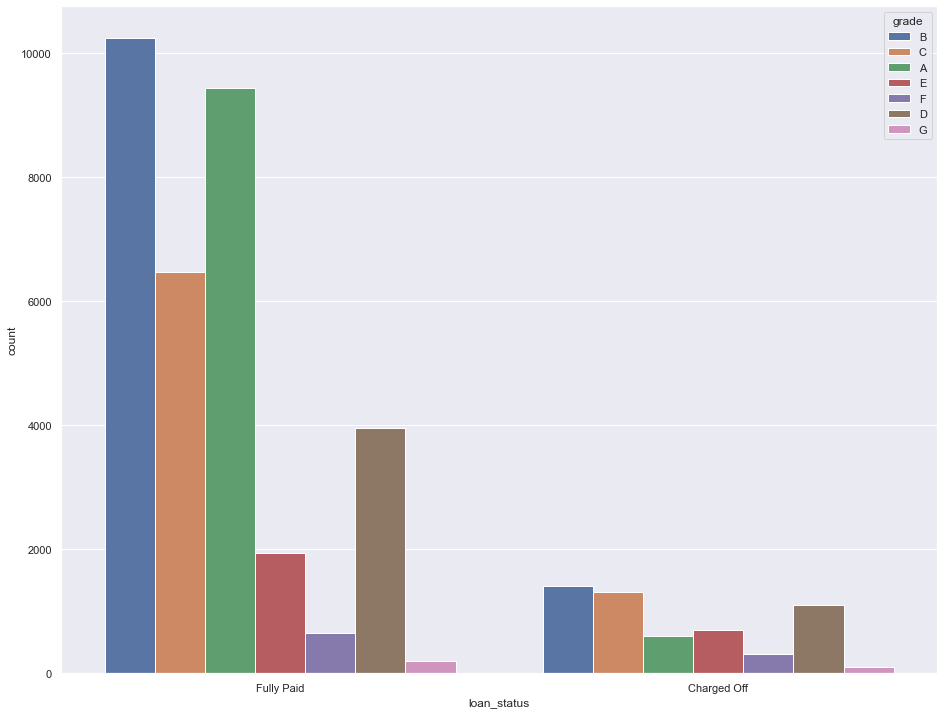

None
loan_status  sub_grade
Charged Off  A1            2.633889
             A2            4.844061
             A3            5.638474
             A4            6.195614
             A5            7.856879
             B1            9.415042
             B2           11.261261
             B3           12.039660
             B4           13.292181
             B5           13.547646
             C1           16.243902
             C2           16.206357
             C3           17.782285
             C4           17.318901
             C5           17.713787
                            ...    
Fully Paid   E1           72.576177
             E2           74.299835
             E3           77.103718
             E4           70.449173
             E5           71.727749
             F1           70.065789
             F2           70.562771
             F3           70.689655
             F4           64.864865
             F5           52.212389
             G1           69.230769


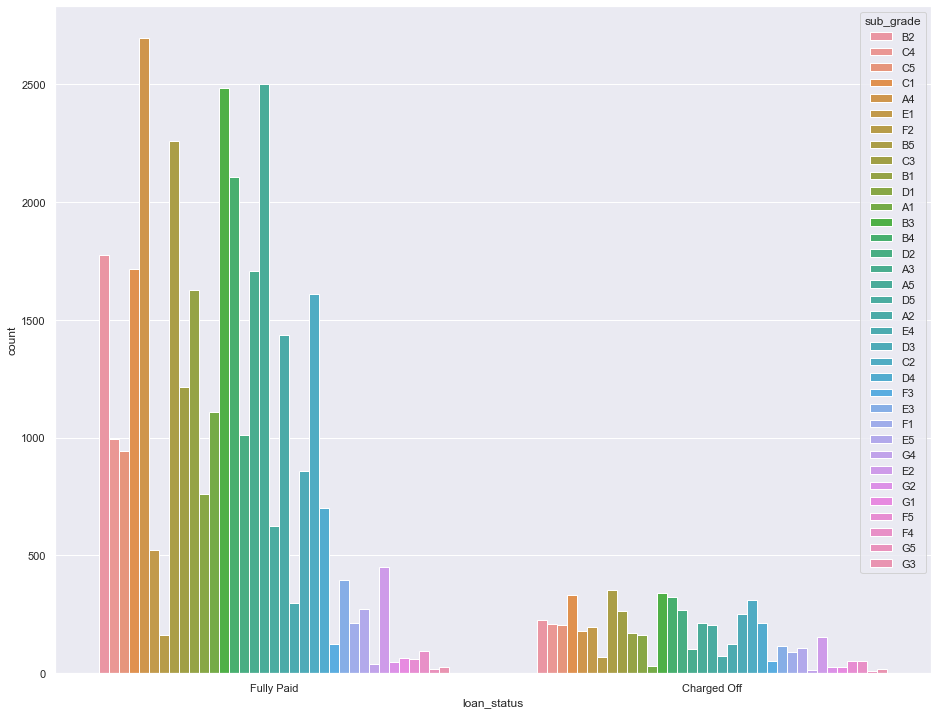

None
loan_status  term      
Charged Off   36 months    10.910721
              60 months    25.155903
Fully Paid    36 months    89.089279
              60 months    74.844097
dtype: float64
Count of Charged Off
   loan_status        term  count
0  Charged Off   36 months   3164
1  Charged Off   60 months   2380


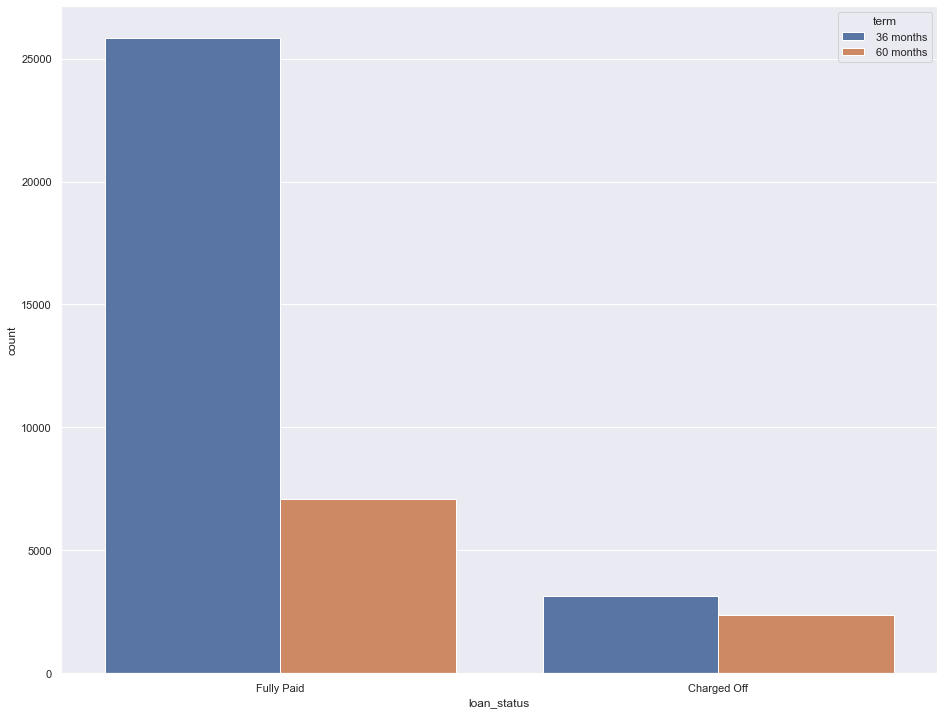

None
loan_status  addr_state
Charged Off  AK            19.230769
             AL            12.009238
             AR            11.538462
             AZ            14.420804
             CA            15.961288
             CO            12.679739
             CT            12.827586
             DC             7.177033
             DE             9.821429
             FL            18.005041
             GA            15.696389
             HI            16.969697
             ID            16.666667
             IL            13.220339
             KS            12.204724
                             ...    
Fully Paid   OK            86.062718
             OR            83.870968
             PA            87.893297
             RI            87.113402
             SC            85.620915
             SD            80.327869
             TN            88.235294
             TX            88.439743
             UT            84.126984
             VA            87.326007
         

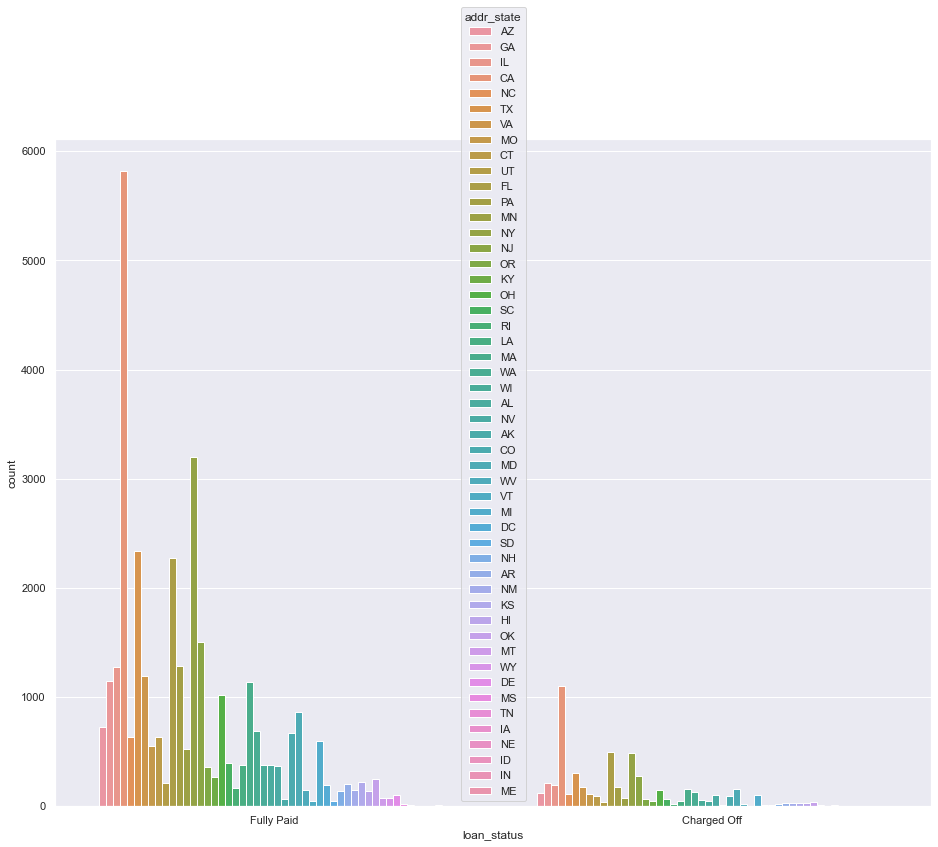

None


In [49]:
category_plots(master_df, ['emp_length', 'home_ownership', 'verification_status', 'grade', 'sub_grade', 'term', 'addr_state'])

In [90]:
def category_plots_2(df, columns = [], default_column="loan_status"):
    for idx, val in enumerate(columns, start=1):
        sns.set(rc={'figure.figsize':(15.7,12.27)})
        ax = sns.countplot(x=master_df[val], hue=master_df[default_column])
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
        display_percentage_Table(df, val, default_column)
        print(plt.show())

loan_status  emp_length
Charged Off  1 year        14.077362
             10+ years     16.236978
             2 years       13.084112
             3 years       13.696576
             4 years       13.611779
             5 years       14.083622
             6 years       14.048059
             7 years       15.348565
             8 years       13.916084
             9 years       12.673753
             < 1 year      13.989753
Fully Paid   1 year        85.922638
             10+ years     83.763022
             2 years       86.915888
             3 years       86.303424
             4 years       86.388221
             5 years       85.916378
             6 years       85.951941
             7 years       84.651435
             8 years       86.083916
             9 years       87.326247
             < 1 year      86.010247
dtype: float64
Count of Charged Off
    loan_status emp_length  count
1   Charged Off  10+ years   1543
10  Charged Off   < 1 year    628
2   Charged Off    2 yea

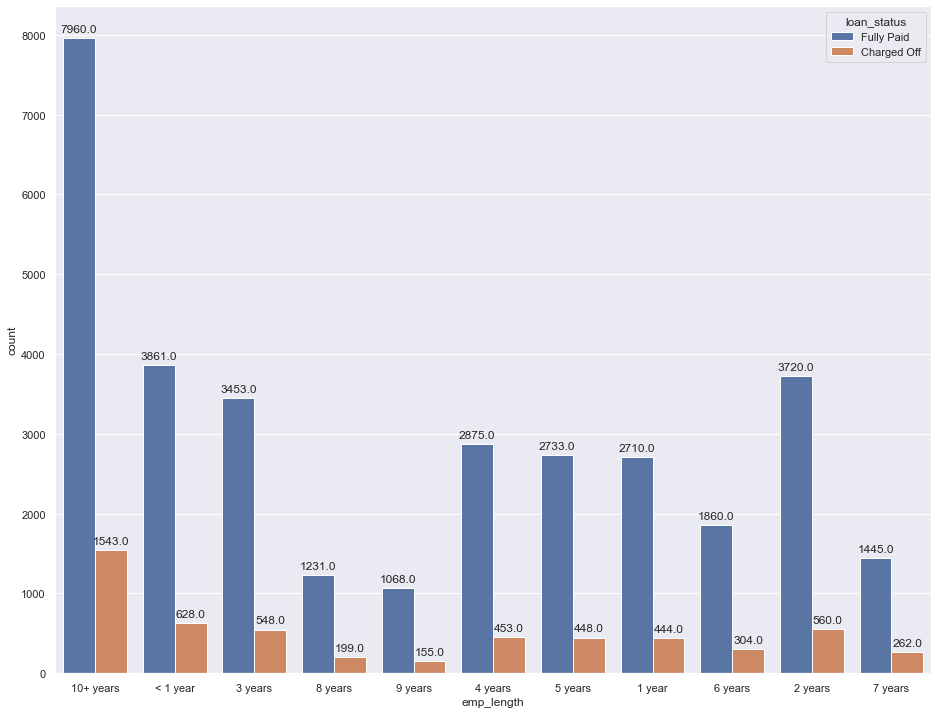

None
loan_status  home_ownership
Charged Off  MORTGAGE           13.590634
             OTHER              18.750000
             OWN                14.704890
             RENT               15.109517
Fully Paid   MORTGAGE           86.409366
             NONE              100.000000
             OTHER              81.250000
             OWN                85.295110
             RENT               84.890483
dtype: float64
Count of Charged Off
   loan_status home_ownership  count
3  Charged Off           RENT   2780
0  Charged Off       MORTGAGE   2310
2  Charged Off            OWN    436
1  Charged Off          OTHER     18


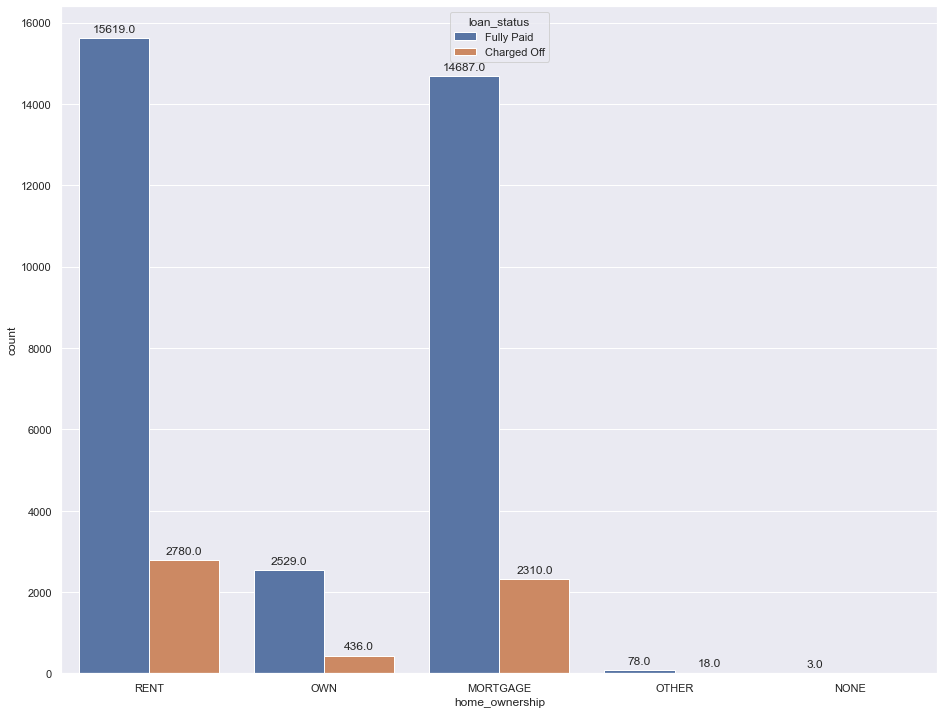

None
loan_status  verification_status
Charged Off  Not Verified           12.627781
             Source Verified        14.689734
             Verified               16.637924
Fully Paid   Not Verified           87.372219
             Source Verified        85.310266
             Verified               83.362076
dtype: float64
Count of Charged Off
   loan_status verification_status  count
0  Charged Off        Not Verified   2100
2  Charged Off            Verified   2026
1  Charged Off     Source Verified   1418


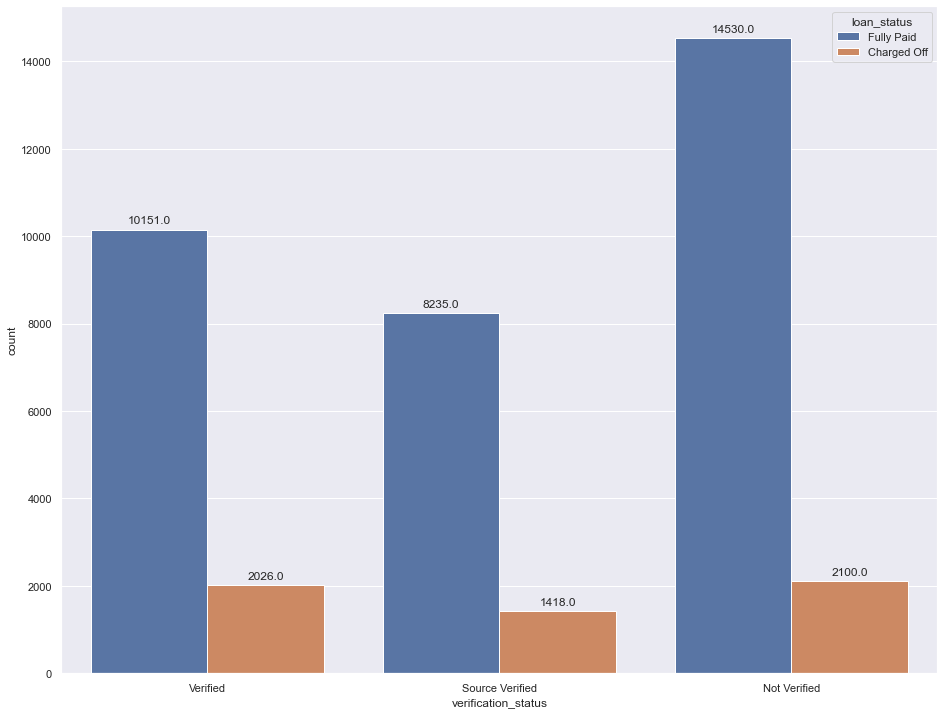

None
loan_status  grade
Charged Off  A         5.936846
             B        12.101201
             C        16.908275
             D        21.795886
             E        26.616257
             F        32.577320
             G        32.881356
Fully Paid   A        94.063154
             B        87.898799
             C        83.091725
             D        78.204114
             E        73.383743
             F        67.422680
             G        67.118644
dtype: float64
Count of Charged Off
   loan_status grade  count
1  Charged Off     B   1411
2  Charged Off     C   1318
3  Charged Off     D   1102
4  Charged Off     E    704
0  Charged Off     A    596
5  Charged Off     F    316
6  Charged Off     G     97


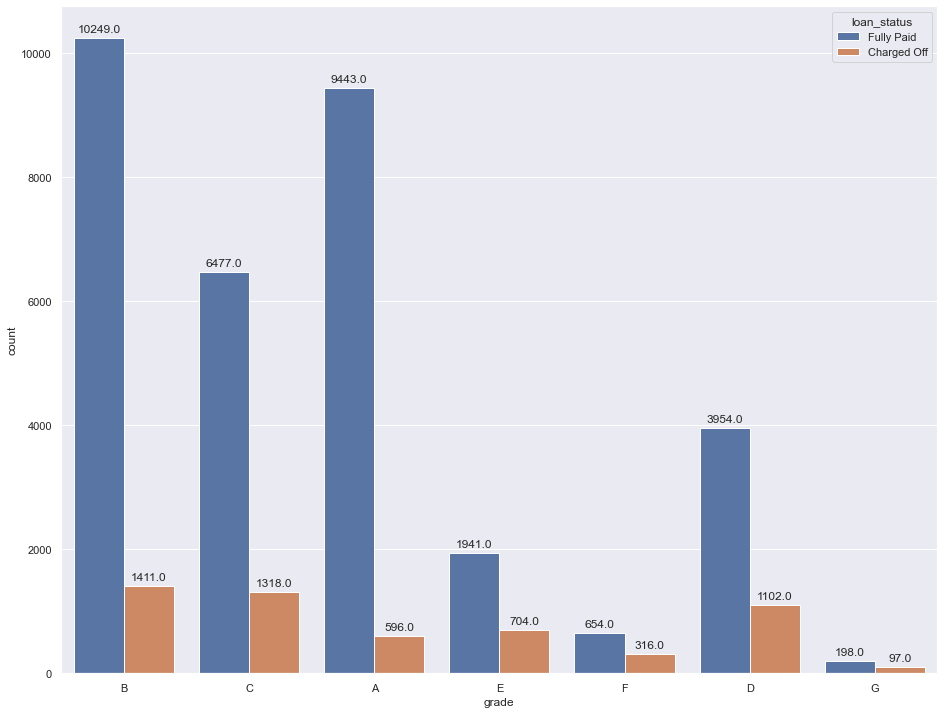

None
loan_status  sub_grade
Charged Off  A1            2.633889
             A2            4.844061
             A3            5.638474
             A4            6.195614
             A5            7.856879
             B1            9.415042
             B2           11.261261
             B3           12.039660
             B4           13.292181
             B5           13.547646
             C1           16.243902
             C2           16.206357
             C3           17.782285
             C4           17.318901
             C5           17.713787
                            ...    
Fully Paid   E1           72.576177
             E2           74.299835
             E3           77.103718
             E4           70.449173
             E5           71.727749
             F1           70.065789
             F2           70.562771
             F3           70.689655
             F4           64.864865
             F5           52.212389
             G1           69.230769


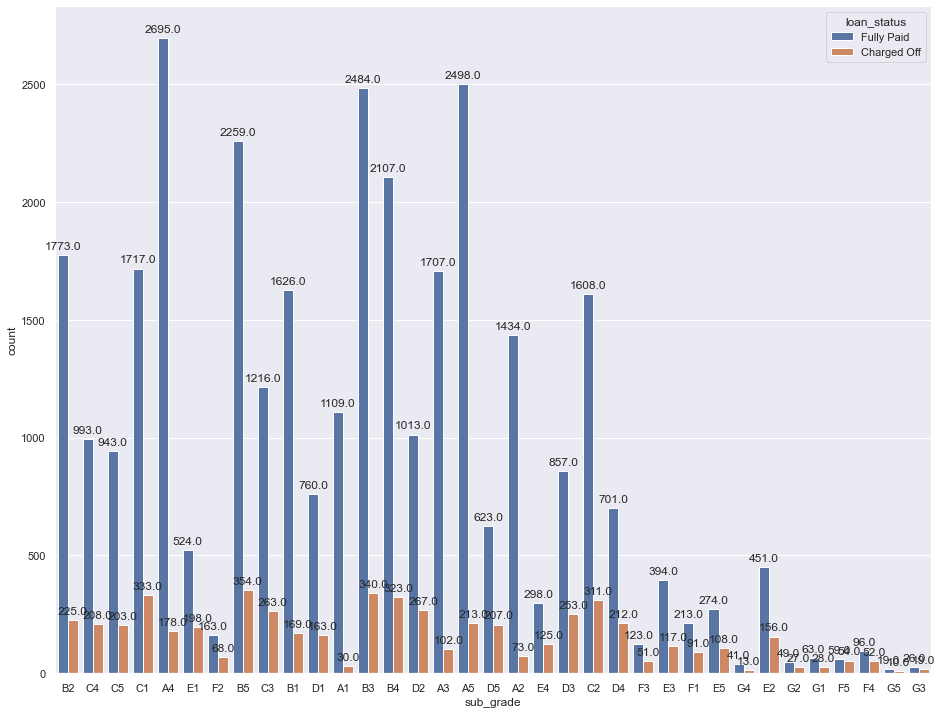

None
loan_status  term      
Charged Off   36 months    10.910721
              60 months    25.155903
Fully Paid    36 months    89.089279
              60 months    74.844097
dtype: float64
Count of Charged Off
   loan_status        term  count
0  Charged Off   36 months   3164
1  Charged Off   60 months   2380


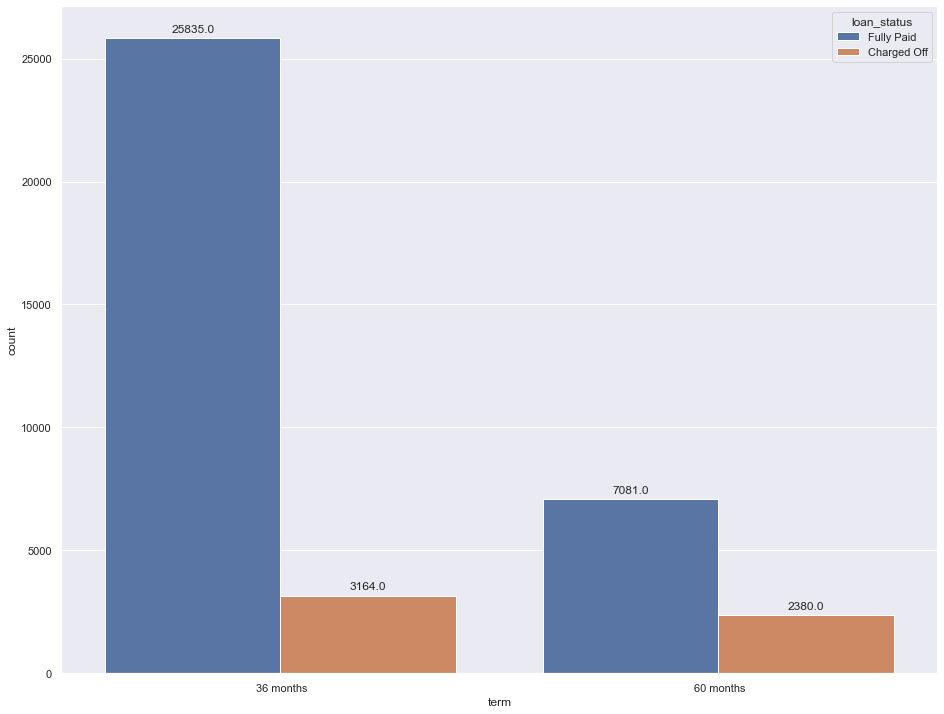

None
loan_status  addr_state
Charged Off  AK            19.230769
             AL            12.009238
             AR            11.538462
             AZ            14.420804
             CA            15.961288
             CO            12.679739
             CT            12.827586
             DC             7.177033
             DE             9.821429
             FL            18.005041
             GA            15.696389
             HI            16.969697
             ID            16.666667
             IL            13.220339
             KS            12.204724
                             ...    
Fully Paid   OK            86.062718
             OR            83.870968
             PA            87.893297
             RI            87.113402
             SC            85.620915
             SD            80.327869
             TN            88.235294
             TX            88.439743
             UT            84.126984
             VA            87.326007
         

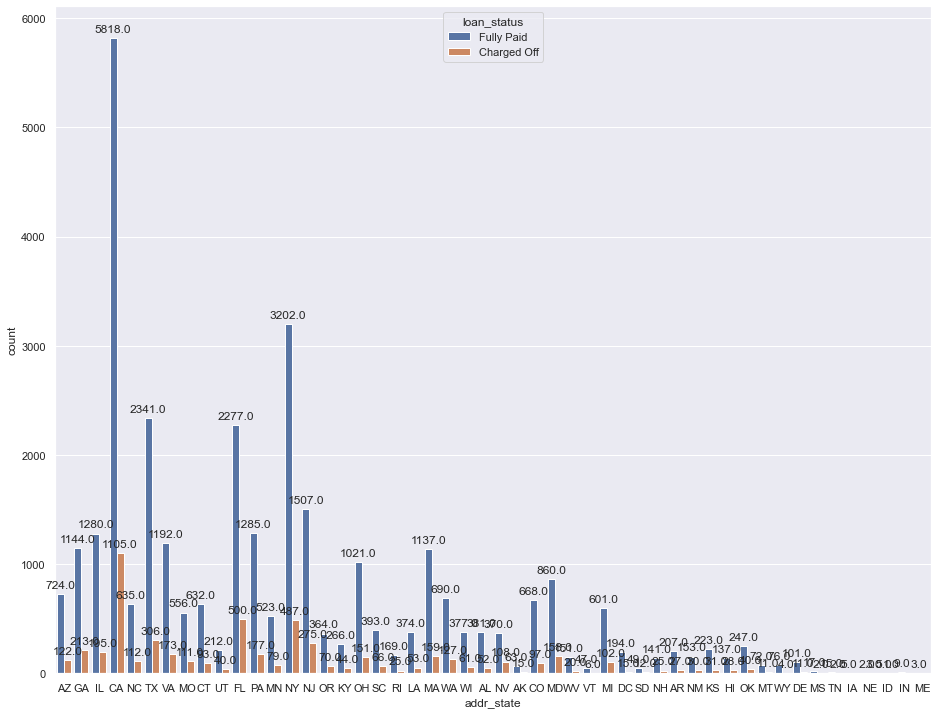

None


In [91]:
category_plots_2(master_df, ['emp_length', 'home_ownership', 'verification_status', 'grade', 'sub_grade', 'term', 'addr_state'])

#### Total Amount Collected

In [52]:
loan_value_received = (master_df.groupby('loan_status').total_pymnt.sum() * 100) / master_df.groupby('loan_status').loan_amnt.sum()
loan_value_received

loan_status
Charged Off     56.925717
Fully Paid     117.108203
dtype: float64

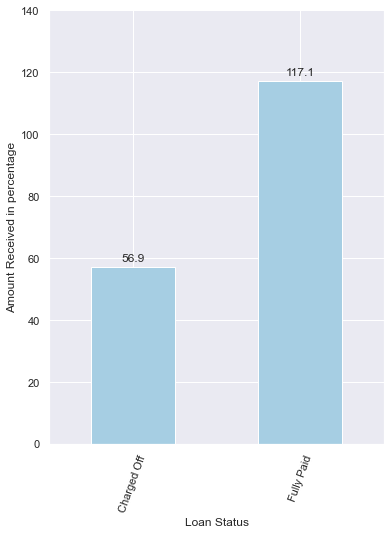

In [84]:
sns.set(rc={'figure.figsize':(6, 8)})
bar_plot = loan_value_received.plot(kind='bar', stacked=True, colormap='Paired')
bar_plot.set(xlabel = "Loan Status", ylabel = "Amount Received in percentage")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.margins(0.2, 0.2)
plt.xticks(rotation=70)
plt.show()

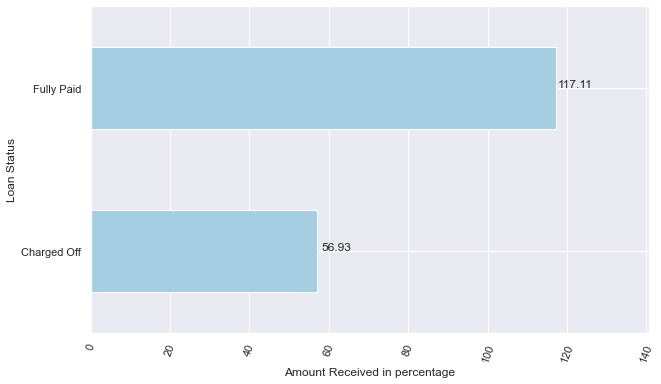

In [81]:
sns.set(rc={'figure.figsize':(10, 6)})
bar_plot = loan_value_received.plot(kind='barh', stacked=True, colormap='Paired')
bar_plot.set(xlabel = "Amount Received in percentage", ylabel = "Loan Status")

for p in bar_plot.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.margins(0.2, 0.2)
plt.xticks(rotation=70)
plt.show()

#### Impact of interest in Charged off

In [54]:
master_df['int_rate_in_perc'] = master_df['int_rate'].str.strip('%').astype('float')
master_df['int_rate_in_perc'].describe()

count    38460.000000
mean        11.924102
std          3.690192
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate_in_perc, dtype: float64

/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


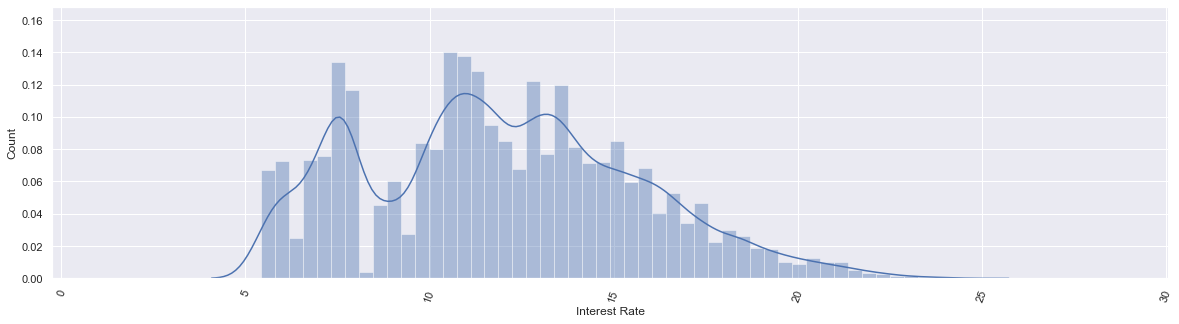

In [55]:
plt.figure(figsize=(20,5))
dist_plot = sns.distplot(x=master_df.int_rate_in_perc)
dist_plot.set(xlabel = "Interest Rate", ylabel = "Count")
plt.margins(0.2, 0.2)
plt.xticks(rotation=70)
plt.show()

In [56]:
master_df['int_rate_bins'] = round(master_df.int_rate_in_perc).astype('int')
master_df.int_rate_bins

0        11
1        15
2        16
3        13
5         8
6        16
7        19
8        21
9        13
10       15
11       13
12       13
13       10
14       11
15       16
         ..
39702    11
39703    10
39704     9
39705     7
39706     8
39707     9
39708    10
39709    11
39710     7
39711     9
39712     8
39713    10
39714     8
39715     7
39716    14
Name: int_rate_bins, Length: 38460, dtype: int64

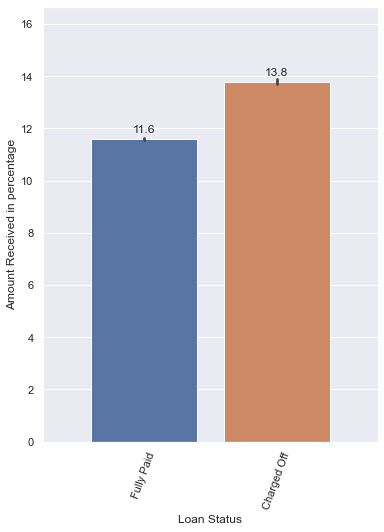

In [57]:
sns.set(rc={'figure.figsize':(6, 8)})
bar_plot = sns.barplot(x=master_df.loan_status, y=master_df.int_rate_bins)
bar_plot.set(xlabel = "Loan Status", ylabel = "Amount Received in percentage")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.margins(0.2, 0.2)
plt.xticks(rotation=70)
plt.show()

In [58]:
int_rate_wise_loan_status = master_df.groupby(['loan_status', 'int_rate_bins'])['loan_amnt_bin'].count()
int_rate_wise_loan_status

loan_status  int_rate_bins
Charged Off  5                  20
             6                  50
             7                 185
             8                 235
             9                 122
             10                359
             11                600
             12                469
             13                719
             14                476
             15                485
             16                558
             17                371
             18                292
             19                232
             20                156
             21                109
             22                 76
             23                 21
             24                  9
Fully Paid   5                 553
             6                1479
             7                3082
             8                3129
             9                1380
             10               3036
             11               4341
             12             

In [59]:
int_rate_bins_counts=master_df.groupby('int_rate_bins')['int_rate_bins'].count()
int_rate_bins_counts

int_rate_bins
5      573
6     1529
7     3267
8     3364
9     1502
10    3395
11    4941
12    3100
13    4589
14    2816
15    2526
16    2601
17    1405
18    1086
19     781
20     444
21     307
22     169
23      42
24      23
Name: int_rate_bins, dtype: int64

In [60]:
int_rate_wise_loan_perc = int_rate_wise_loan_status.div(int_rate_bins_counts, level='int_rate_bins') * 100
int_rate_wise_loan_perc = int_rate_wise_loan_perc.reset_index(name="percentage")
int_rate_wise_loan_perc.head()

,loan_status,int_rate_bins,percentage
0,Charged Off,5,3.490401
1,Charged Off,6,3.270111
2,Charged Off,7,5.662687
3,Charged Off,8,6.985731
4,Charged Off,9,8.122503


In [61]:
int_rate_wise_loan_status = int_rate_wise_loan_status.reset_index(name="count")
int_rate_wise_loan_status['perc'] = int_rate_wise_loan_perc['percentage']
int_rate_wise_loan_status

,loan_status,int_rate_bins,count,perc
0,Charged Off,5,20,3.490401
1,Charged Off,6,50,3.270111
2,Charged Off,7,185,5.662687
3,Charged Off,8,235,6.985731
4,Charged Off,9,122,8.122503
5,Charged Off,10,359,10.574374
6,Charged Off,11,600,12.143291
7,Charged Off,12,469,15.129032
8,Charged Off,13,719,15.667902
9,Charged Off,14,476,16.903409


In [62]:
charged_off_values = int_rate_wise_loan_status[int_rate_wise_loan_status.loan_status == 'Charged Off']
charged_off_values = charged_off_values[['int_rate_bins', 'count', 'perc']]
charged_off_values

,int_rate_bins,count,perc
0,5,20,3.490401
1,6,50,3.270111
2,7,185,5.662687
3,8,235,6.985731
4,9,122,8.122503
5,10,359,10.574374
6,11,600,12.143291
7,12,469,15.129032
8,13,719,15.667902
9,14,476,16.903409


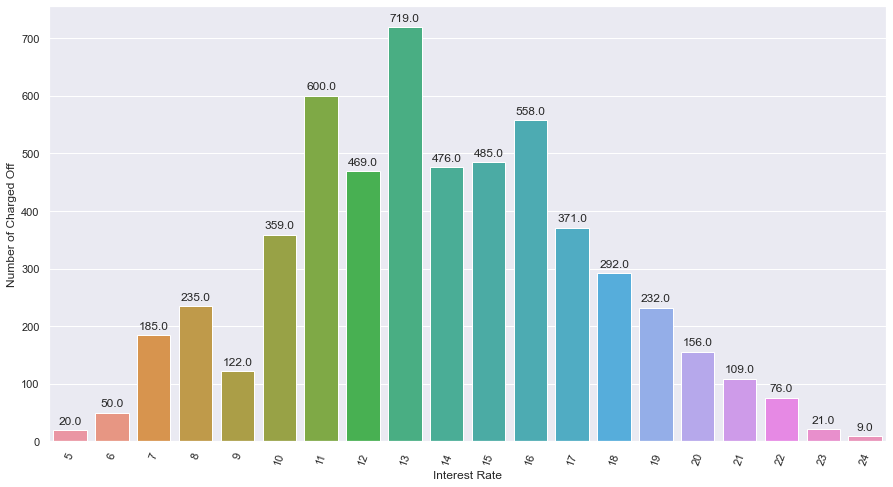

In [63]:
sns.set(rc={'figure.figsize':(15, 8)})
bar_plot = sns.barplot(data=charged_off_values, x='int_rate_bins', y='count')
bar_plot.set(xlabel = "Interest Rate", ylabel = "Number of Charged Off")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

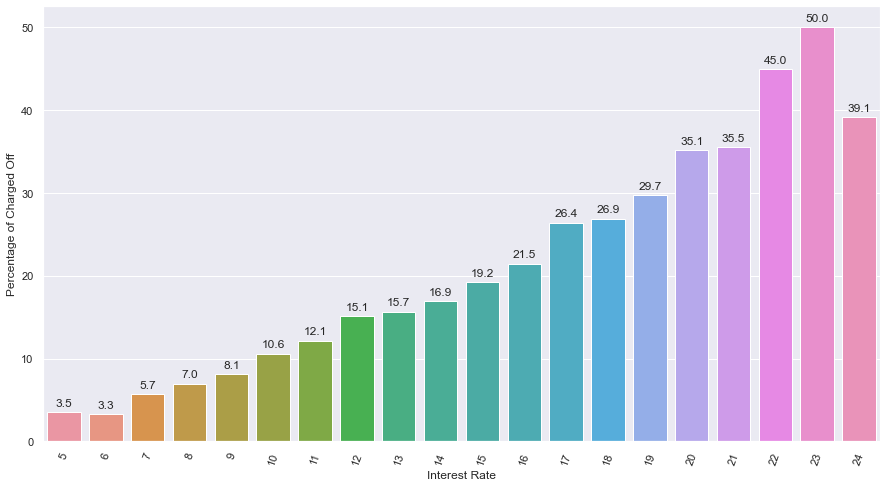

In [64]:
sns.set(rc={'figure.figsize':(15, 8)})
bar_plot = sns.barplot(data=charged_off_values, x='int_rate_bins', y='perc')
bar_plot.set(xlabel = "Interest Rate", ylabel = "Percentage of Charged Off")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

#### Impact of loan issued date on Charged Off

In [65]:
master_df.issue_d.value_counts()

Nov-11    2056
Dec-11    2041
Oct-11    1936
Sep-11    1907
Aug-11    1797
Jul-11    1736
Jun-11    1724
May-11    1605
Apr-11    1556
Mar-11    1435
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1125
Nov-10    1120
Jul-10    1117
Sep-10    1085
Aug-10    1073
Jun-10    1022
May-10     918
Apr-10     826
Mar-10     735
Feb-10     622
Nov-09     597
Dec-09     595
Jan-10     585
Oct-09     543
Sep-09     447
Aug-09     408
Jul-09     372
Jun-09     353
May-09     319
Apr-09     287
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [66]:
loan_issue_date = pd.to_datetime(master_df.issue_d.str.upper(), format='%b-%y', yearfirst=False)
loan_issue_date.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [67]:
master_df['issue_d_month'] = loan_issue_date.dt.month_name()
master_df['issue_d_month'].head()

0    December
1    December
2    December
3    December
5    December
Name: issue_d_month, dtype: object

In [68]:
master_df['issue_d_year'] = loan_issue_date.dt.year
master_df['issue_d_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_d_year, dtype: int64

In [69]:
charged_off_df = master_df[master_df.loan_status == 'Charged Off']
charged_off_df.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt,loan_amnt_bin,int_rate_in_perc,int_rate_bins,issue_d_month,issue_d_year
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1687,9.40%,1008.71,Apr-13,119.66,0-5k,15.27,15,December,2011
8,1306957,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,5210,32.60%,646.02,Apr-12,152.39,5-10k,21.28,21,December,2011
9,1306721,5375,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,...,9279,36.50%,1476.19,Nov-12,121.45,5-10k,12.69,13,December,2011
12,1298717,9000,36 months,13.49%,305.38,C,C1,< 1 year,RENT,30000.0,...,10452,91.70%,2270.70,Jul-12,305.38,5-10k,13.49,13,December,2011
14,1303503,10000,36 months,10.65%,325.74,B,B2,3 years,RENT,100000.0,...,11997,55.50%,7471.99,Oct-13,325.74,5-10k,10.65,11,December,2011


In [70]:
loan_status_counts = (master_df.groupby(['issue_d_month'])['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
loan_status_counts

,issue_d_month,loan_status,percentage
0,April,Fully Paid,87.110482
1,April,Charged Off,12.889518
2,August,Fully Paid,86.305827
3,August,Charged Off,13.694173
4,December,Fully Paid,83.962937
5,December,Charged Off,16.037063
6,February,Fully Paid,87.840136
7,February,Charged Off,12.159864
8,January,Fully Paid,86.551433
9,January,Charged Off,13.448567


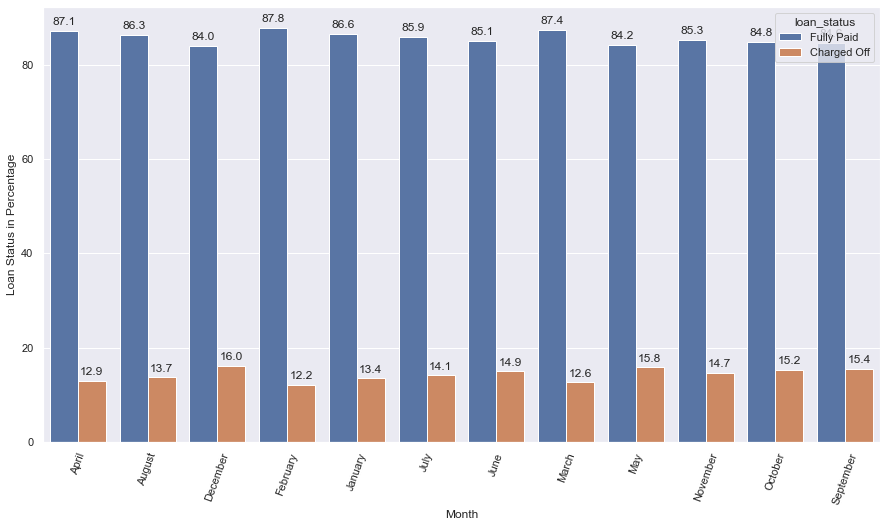

In [71]:
sns.set(rc={'figure.figsize':(15, 8)})
bar_plot = sns.barplot(data=loan_status_counts, x='issue_d_month', y='percentage', hue='loan_status')
bar_plot.set(xlabel = "Month", ylabel = "Loan Status in Percentage")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

Impact of __loan_amnt and annual_inc__ on Charged off applicants

In [97]:
master_df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.846000e+04
mean     6.884754e+04
std      6.425481e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
90%      1.152000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [114]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
annual_inc_df = master_df[np.abs(master_df.annual_inc-master_df.annual_inc.mean()) <= (3*master_df.annual_inc.std())]

In [115]:
annual_inc_df.annual_inc.describe()

count     38182.000000
mean      65891.290108
std       36388.454749
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      260735.000000
Name: annual_inc, dtype: float64

/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


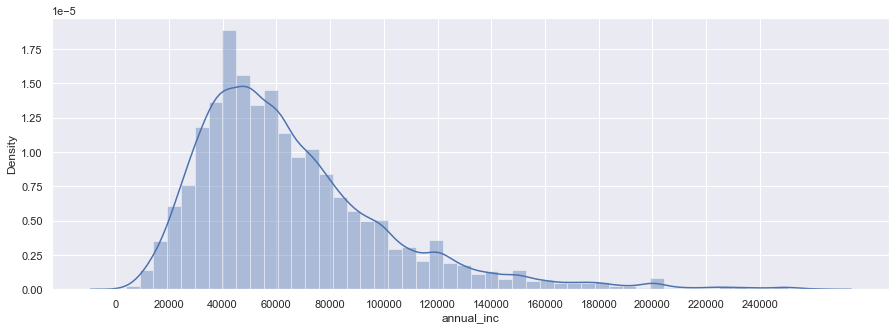

In [116]:
plt.figure(figsize=(15, 5))
sns.distplot(annual_inc_df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [121]:
annual_inc_bins = [x for x in range(0, int(annual_inc_df.annual_inc.max()), 20000)]
len(annual_inc_bins)

14

In [122]:
annual_inc_bins_label = [str(x)+'-'+str(x+20)+'k' for x in range (0, int(annual_inc_df.annual_inc.max())//1000, 20)]
len(annual_inc_bins_label)

13

In [123]:
#Create Derived categorical variable
annual_inc_df['annual_inc_bins'] = pd.cut(annual_inc_df.annual_inc, annual_inc_bins, labels=annual_inc_bins_label)

annual_inc_df.head()

<ipython-input-123-8d565cbe6ac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_inc_df['annual_inc_bins'] = pd.cut(annual_inc_df.annual_inc, annual_inc_bins, labels=annual_inc_bins_label)


,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_pymnt,last_pymnt_d,last_pymnt_amnt,loan_amnt_bin,int_rate_in_perc,int_rate_bins,issue_d_month,issue_d_year,annual_inc_bins
0,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,83.70%,5863.155187,Jan-15,171.62,0-5k,10.65,11,December,2011,20-40k
1,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,9.40%,1008.710000,Apr-13,119.66,0-5k,15.27,15,December,2011,20-40k
2,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,98.50%,3005.666844,Jun-14,649.91,0-5k,15.96,16,December,2011,0-20k
3,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,21%,12231.890000,Jan-15,357.48,5-10k,13.49,13,December,2011,40-60k
5,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,28.30%,5632.210000,Jan-15,161.03,0-5k,7.90,8,December,2011,20-40k


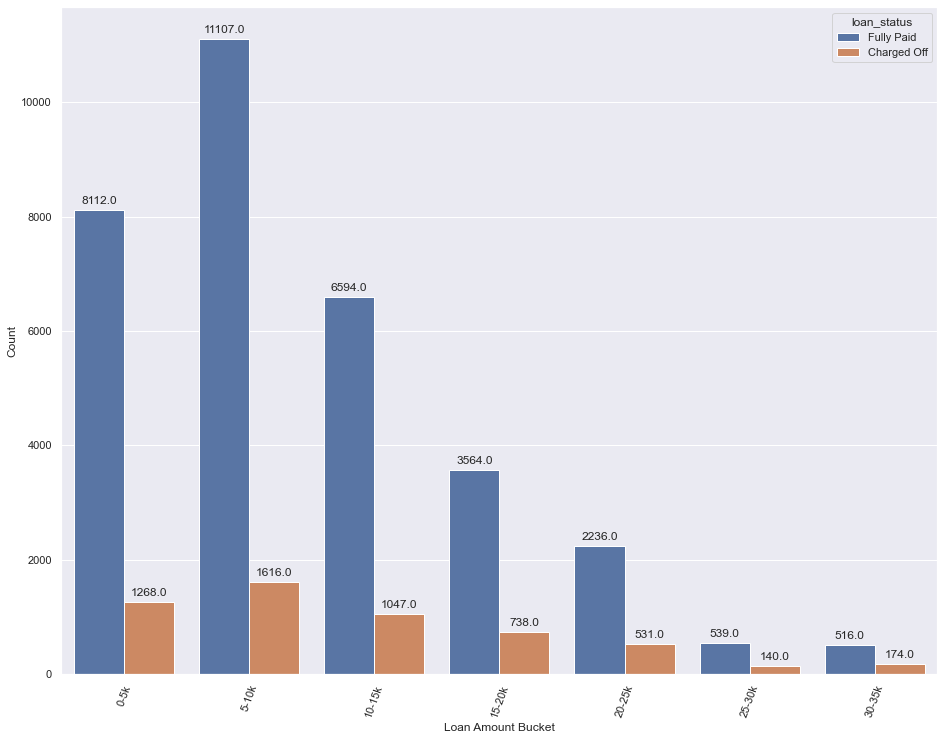

In [129]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
count_plt = sns.countplot(x=annual_inc_df.loan_amnt_bin, hue=annual_inc_df.loan_status)
count_plt.set(xlabel = "Annual Income Bucket", ylabel = "Count")
for p in count_plt.patches:
            count_plt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

In [130]:
annual_inc_df_bin = annual_inc_df.groupby(['loan_status', 'annual_inc_bins'])['annual_inc_bins'].count()
annual_inc_df_bin

loan_status  annual_inc_bins
Charged Off  0-20k               219
             20-40k             1492
             40-60k             1708
             60-80k             1008
             80-100k             526
             100-120k            244
             120-140k            136
             140-160k             84
             160-180k             36
             180-200k             31
             200-220k             11
             220-240k             13
             240-260k              6
Fully Paid   0-20k               933
             20-40k             6991
             40-60k             9528
             60-80k             6596
             80-100k            3982
             100-120k           2083
             120-140k           1081
             140-160k            625
             160-180k            348
             180-200k            240
             200-220k            104
             220-240k             89
             240-260k             67
Name: ann

In [131]:
num_of_annual_inc_df_bin=annual_inc_df.groupby('annual_inc_bins')['annual_inc_bins'].count()
num_of_annual_inc_df_bin

annual_inc_bins
0-20k        1152
20-40k       8483
40-60k      11236
60-80k       7604
80-100k      4508
100-120k     2327
120-140k     1217
140-160k      709
160-180k      384
180-200k      271
200-220k      115
220-240k      102
240-260k       73
Name: annual_inc_bins, dtype: int64

In [ ]:
annual_inc_df_bin = annual_inc_df_bin.div(num_of_annual_inc_df_bin, level='annual_inc_bins') * 100
annual_inc_df_bin = annual_inc_df_bin.reset_index(name="percentage")

In [135]:
annual_inc_df_bin = annual_inc_df_bin[annual_inc_df_bin['loan_status'] == "Charged Off"]
annual_inc_df_bin

,loan_status,annual_inc_bins,percentage
0,Charged Off,0-20k,1.650210
1,Charged Off,20-40k,0.207334
2,Charged Off,40-60k,0.135290
3,Charged Off,60-80k,0.174332
4,Charged Off,80-100k,0.258832
5,Charged Off,100-120k,0.450606
6,Charged Off,120-140k,0.918243
7,Charged Off,140-160k,1.671040
8,Charged Off,160-180k,2.441406
9,Charged Off,180-200k,4.221075


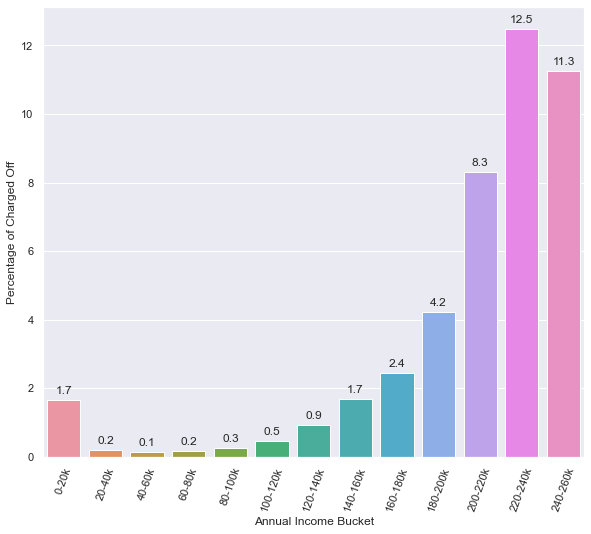

In [144]:
sns.set(rc={'figure.figsize':(9.7,8.27)})
bar_plt = sns.barplot(x=annual_inc_df_bin.annual_inc_bins, y=annual_inc_df_bin.percentage)
bar_plt.set(xlabel = "Annual Income Bucket", ylabel = "Percentage of Charged Off")
for p in bar_plt.patches:
            bar_plt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=70)
plt.show()

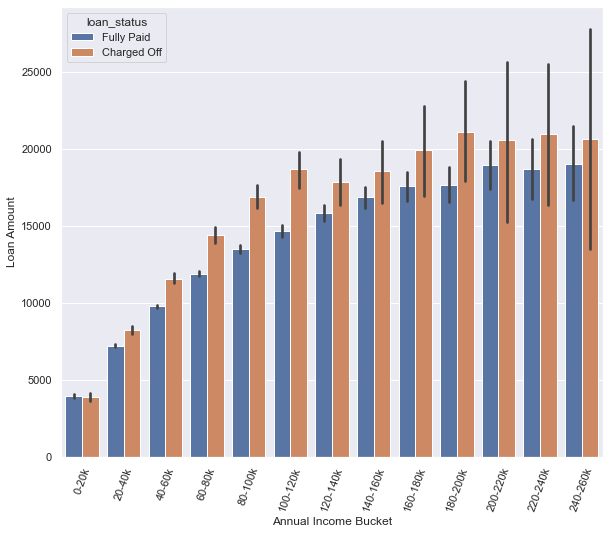

In [160]:
sns.set(rc={'figure.figsize':(9.7,8.27)})
bar_plt = sns.barplot(x=annual_inc_df.annual_inc_bins, y=annual_inc_df.loan_amnt, hue=annual_inc_df.loan_status)
bar_plt.set(xlabel = "Annual Income Bucket", ylabel = "Loan Amount")
plt.xticks(rotation=70)
plt.show()